Ejercicio 2: Importación y Uso de Módulos
(En este ejercicio ya vamos a usar los notebooks)
Debes crear un programa que funcione como comparador de acciones. El programa
debe cumplir los siguientes requisitos:
1. Input: Debe solicitar al usuario por pantalla dos tickers de acciones (ej.
"AAPL" y "MSFT").
2. Proceso: Debe descargar los datos (con yfinance) de ambos activos (año
actual) y utilizar obligatoriamente las funciones de tu archivo finanzas_utils.py
para analizar el último precio y la volatilidad histórica.
3. Output: Debe imprimir una frase comparativa indicando cuales son las
volatilidades de los dos a nivel mensual y anual. Así como cuál ha tenido
mejor rendimiento en el último año y mes.

In [5]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import finanzas_utils as ut


# ---------- SOLICITUD DE TICKERS
ticker1 = input("Introduce ticker1: ").strip().upper()
ticker2 = input("Introduce el ticker2: ").strip().upper()

# --> FECHAS
year = pd.Timestamp.today().year
start = f"{year}-01-01"
end = pd.Timestamp.today().strftime("%Y-%m-%d")



# --> DESCARGA DE DATOS TICKERS
d1 = yf.download(ticker1, start=start, end=end, progress=False)
d2 = yf.download(ticker2, start=start, end=end, progress=False)

# Limpieza
close1 = pd.Series(d1["Close"].squeeze()).astype(float).dropna()
close2 = pd.Series(d2["Close"].squeeze()).astype(float).dropna()



#  --> CÁLCULO DE RETORNOS:
#TICKER 1
ret_anual1 = ut.calcular_retorno_diario(close1.iloc[-1], close1.iloc[0])
idx_m1 = -21 if len(close1) > 21 else 0
ret_mensual1 = ut.calcular_retorno_diario(close1.iloc[-1], close1.iloc[idx_m1])

# Volatilidad Anualizada
returns1 = close1.pct_change().dropna()
vol_anual1 = returns1.std() * np.sqrt(252) * 100
cat_vol1a= ut.categorizar_volatilidad(vol_anual1)

# Volatilidad Mensual (ultimos 21 días)
vol_mensual1 = returns1.iloc[idx_m1:].std() * np.sqrt(21) * 100
cat_vol1m= ut.categorizar_volatilidad(vol_mensual1)


#TICKER 2
ret_anual2 = ut.calcular_retorno_diario(close2.iloc[-1], close2.iloc[0])
idx_m2 = -21 if len(close2) > 21 else 0
ret_mensual2 = ut.calcular_retorno_diario(close2.iloc[-1], close2.iloc[idx_m2])

# Volatilidad Anualizada
returns2 = close2.pct_change().dropna()
vol_anual2 = returns2.std() * np.sqrt(252) * 100
cat_vol2a= ut.categorizar_volatilidad(vol_anual2)

# Volatilidad Mensual
vol_mensual2 = returns2.iloc[idx_m2:].std() * np.sqrt(21) * 100
cat_vol2m= ut.categorizar_volatilidad(vol_mensual2)



# --> COMPARATIVA
print(f"\n{'='*60}")
print(f"   RESULTADOS COMPARATIVOS ({year})")
print(f"{'='*60}")

for t, ra, rm, va, vm, cata, catm in [
    (ticker1, ret_anual1, ret_mensual1, vol_anual1, vol_mensual1, cat_vol1a, cat_vol1m),
    (ticker2, ret_anual2, ret_mensual2, vol_anual2, vol_mensual2, cat_vol2a, cat_vol2m)
]:
    print(f"TICKER: {t}")
    print(f"  - Retorno Anual:    {ra:.3f}%")
    print(f"  - Retorno Mensual:  {rm:.3f}%")
    print(f"  - Volatilidad Anualizada:{va:.3f}% ({cata})")
    print(f"  - Volatilidad Mensual:   {vm:.3f}% ({catm})")
    print("-" * 40)


# --> COMENTARIOS
print("\n============================== CONCLUSIONES ==============================")

# Mejor rendimiento anual
mejor_año = ticker1 if ret_anual1 > ret_anual2 else ticker2
print(f"De la tabla anterior se observa que el mejor rendimiento anual lo tiene: {mejor_año}")

# Mejor rendimiento mensual
mejor_mes = ticker1 if ret_mensual1 > ret_mensual2 else ticker2
print(f"El mejor rendimeinto mensual lo tiene: {mejor_mes}")

# Comparación de Volatilidad anaul
volt_anual = ticker1 if vol_anual1 < vol_anual2 else ticker2
print(f"De los dos activos comparados el de menor volatilidad durante el año fue: {volt_anual}")

# Comparación de Volatilidad mensual
volt_mensual = ticker1 if vol_mensual1 < vol_mensual2 else ticker2
print(f"El activo de menor volatilidad durante el mes fue: {volt_mensual}")

print(f"{'='*80}")


ModuleNotFoundError: No module named 'finanzas_utils'

Ejercicio 3: Análisis Técnico y Visualización
Sobre los datos descargados de una de las empresas anteriores, realiza un análisis
de Cruces de Medias (Golden Cross):
1. Calcula y añade al DataFrame dos nuevas columnas: la Media Móvil de 50
días y la Media Móvil de 200 días (sobre los cierres).
2. Genera una visualización que muestre:
● El precio de cierre.
● Las dos medias móviles calculadas.
3. El gráfico debe incluir título, leyenda y tener un tamaño adecuado para su
correcta lectura.
4. Calcula los puntos en los que las medias se cruzan. (Si esto no ocurre con tu
activo puedes probar a cambiar el activo por uno más volátil o coger una
ventana temporal más grande)

Introduce el año para poder apreciar los cruces de media en {ticker1}:   2021


/tmp/ipython-input-1247953882.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_analisis = yf.download(ticker1, start=start, end=end, progress=False)


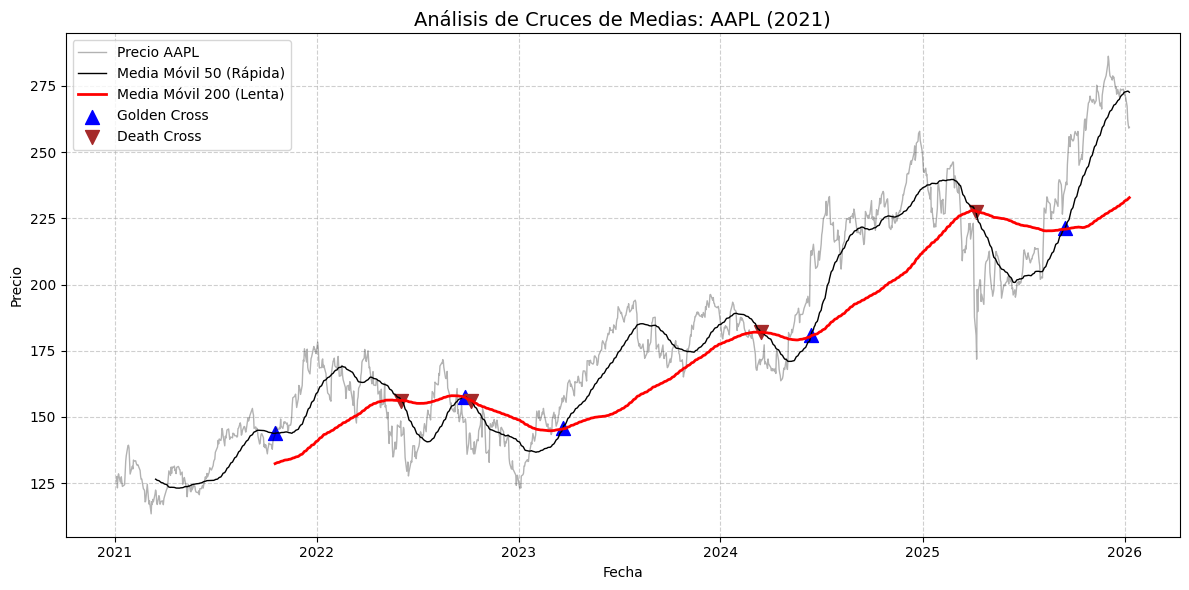

--- Análisis Técnico de AAPL ---
Cruces dorados detectados: 5
Cruces de la muerte detectados: 4


In [ ]:
# Para este ejercicio se debe usar los datos del primer ticker, d1, donde para agregar las nuevas columnas
# haria una copia, df_analisis = d1.copy()  pero en vista de que no tiene el minimo de datos como para poder apreciar el
# cruce de medias, cree un imput para que me pida el año y poder ir jugando con la grafica.


while True:
    try:
        year = int(input("Introduce el año para poder apreciar los cruces de media en {ticker1}:   "))

        if year < 2000:
            print(f"Error: El año es demasiado antiguo.")
        elif year > 2026:
            print(f"Error: El año no puede ser superior al actual.")
        else:
            break
    except ValueError:
        print("Error: introduce solo numeros de fechas validas.")


start = f"{year}-01-01"
end = pd.Timestamp.today().strftime("%Y-%m-%d")

df_analisis = yf.download(ticker1, start=start, end=end, progress=False)

# 1. CÁLCULO DE MEDIAS MÓVILES (SMA - Simple Moving Average)

df_analisis['SMA50'] = df_analisis['Close'].rolling(window=50).mean()
df_analisis['SMA200'] = df_analisis['Close'].rolling(window=200).mean()

# 2. IDENTIFICACIÓN DE PUNTOS DE CRUCE
# si la sma50 > sma200, sera 1, si no 0.
df_analisis['Posicion'] = np.where(df_analisis['SMA50'] > df_analisis['SMA200'], 1, 0)
# utilizando (diff) puedo saber cuándo cambia, de 0 a 1 (cruce alcista) y de 1 a 0 (cruce bajista)
df_analisis['Cruce'] = df_analisis['Posicion'].diff()


# 3. VISUALIZACIÓN
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Graficamos el precio y las medias
plt.plot(df_analisis['Close'], label=f'Precio {ticker1}', color='black', alpha=0.3, lw=1)
plt.plot(df_analisis['SMA50'], label='Media Móvil 50 (Rápida)', color='black', lw=1)
plt.plot(df_analisis['SMA200'], label='Media Móvil 200 (Lenta)', color='red', lw=2)

# Se añaden las flechas que indican los cruces
# Cruce Dorado:: SMA50 cruza hacia arriba la SMA200
cruces_dorados = df_analisis[df_analisis['Cruce'] == 1]
plt.scatter(cruces_dorados.index, cruces_dorados['SMA50'], marker='^', color='blue', s=100, label='Golden Cross')

# Cruce de Muerte: SMA50 cruza hacia abajo la SMA200
cruces_muerte = df_analisis[df_analisis['Cruce'] == -1]
plt.scatter(cruces_muerte.index, cruces_muerte['SMA50'], marker='v', color='brown', s=100, label='Death Cross')

# Personalización del gráfico
plt.title(f"Análisis de Cruces de Medias: {ticker1} ({year})", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. RESULTADOS POR PANTALLA
print(f"--- Análisis Técnico de {ticker1} ---")
print(f"Cruces dorados detectados: {len(cruces_dorados)}")
print(f"Cruces de la muerte detectados: {len(cruces_muerte)}")

Ejercicio 4 Análisis de Series Temporales
Los datos financieros suelen venir solo en días laborables. Vamos a arreglar eso.
(si no tienes un rango en mente, usa de rango desde el año 2020, hasta el 1 de
diciembre de 2025)
1. Generación de huecos: Crea un rango de fechas completo que incluya
todos los días naturales (incluidos fines de semana) para el período de tus
datos y haz un reindex de tu DataFrame. Esto generará valores nulos (NaN)
en los días no laborables.
2. Detección: Muestra por pantalla cuántos valores nulos se han generado en
la columna de precios.
3. Limpieza: Rellena estos nulos utilizando el método de "Relleno hacia
adelante" (Forward Fill). Lógica: El precio del sábado es el mismo que el del
cierre del viernes(muestra por pantalla).
A menudo el ruido diario dificulta ver la tendencia. Se pide cambiar la granularidad
de los datos:
4. Toma el DataFrame de precios diarios y realiza un remuestreo (resample)
para obtener datos de frecuencia Mensual.
5. Calcula el precio promedio de cierre de cada mes.
6. Genera un gráfico de barras que muestre la evolución del precio promedio
mensual durante el último año.

In [ ]:
import yfinance as yf
import pandas as pd

# 1. Descarga de datos del S&P 500 ^GSPC
ticker3 = input("Introduce ticker: ").strip().upper()

start= "2020-01-01"
end= "2025-12-01"
df = yf.download(ticker3, start=start, end=end, progress=False)
df['Close'].head()



Introduce ticker: msft


/tmp/ipython-input-3605417853.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker3, start=start, end=end, progress=False)


Ticker,MSFT
Date,
2020-01-02,152.505707
2020-01-03,150.606735
2020-01-06,150.996017
2020-01-07,149.619247
2020-01-08,152.002457


In [ ]:

# Rango de fechas completo, incluyendo fines de semana.
# 'D' indica frecuencia diaria (calendario completo)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# 3. Reindexar el DataFrame,para insertar los NaN en los huecos (fines de semana y festivos)

df_reindexed = df.reindex(full_range)
df_reindexed.index.name="Date"

print(df_reindexed['Close'].head(10))



Ticker            MSFT
Date                  
2020-01-02  152.505707
2020-01-03  150.606735
2020-01-04         NaN
2020-01-05         NaN
2020-01-06  150.996017
2020-01-07  149.619247
2020-01-08  152.002457
2020-01-09  153.901459
2020-01-10  153.189316
2020-01-11         NaN


In [ ]:
# Valores nlos en precios de cierre
nulos_cierre = df_reindexed['Close'].isna().sum()

print(f"Valores nulos en la columna 'Close': {nulos_cierre}")

Valores nulos en la columna 'Close': Ticker
MSFT    672
dtype: int64


In [ ]:
# Rellenar los nulos: el sábado y domingo asignandole el valor del viernes
df_filled = df_reindexed['Close'].ffill()

df_2025 = df_filled.loc['2025-11-01':'2025-12-31']
print(df_2025.iloc[6:10])

Ticker            MSFT
Date                  
2025-11-07  495.891876
2025-11-08  495.891876
2025-11-09  495.891876
2025-11-10  505.054718


In [ ]:
# Resample a frecuencia mensual ('ME') y cálculo del promedio
df_mensual = df_filled.resample('ME').mean()

print("\nPrecio promedio de cierre de los últimos 12 meses:")
print(df_mensual.tail(12))


Precio promedio de cierre de los últimos 12 meses:
Ticker            MSFT
Date                  
2024-12-31  435.699165
2025-01-31  425.055423
2025-02-28  406.016770
2025-03-31  386.267640
2025-04-30  375.536104
2025-05-31  445.757320
2025-06-30  476.621288
2025-07-31  504.326119
2025-08-31  514.725148
2025-09-30  507.126513
2025-10-31  518.985752
2025-11-30  496.449561


<Figure size 1200x600 with 0 Axes>

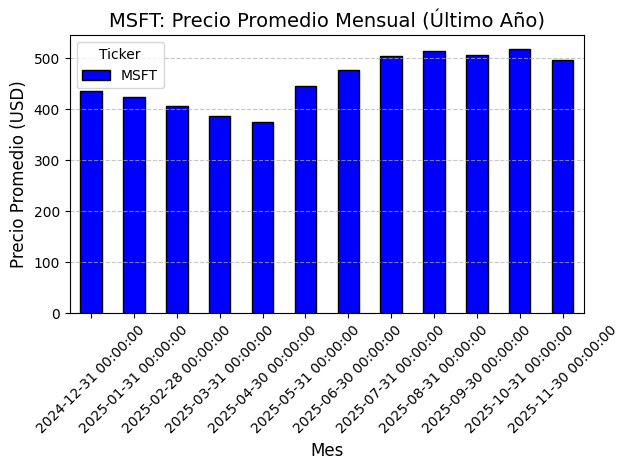

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el último año (Diciembre 2024 a Diciembre 2025)
ultimo_ano = df_mensual.tail(12)

# Generar gráfico de barras
plt.figure(figsize=(12, 6))
ultimo_ano.plot(kind='bar', color='blue', edgecolor='black')

plt.title(f'{ticker3}: Precio Promedio Mensual (Último Año)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Ejercicio 5: Web Scraping Automático
1. Accede a la página de Wikipedia de los componentes del S & P 500
(https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
2. Obtén los datos de las tablas que existen en esta página. (una es de las
compañías del sp500 y la otra indica los cambios en el sp500)
3. Guarda esos datos en dos .csv distintos.
4. Muestra la empresa más antigua que se encuentra en el índice.
5. Muestra la empresa que más veces ha salido del índice, y la que más veces
ha entrado.

In [ ]:
import pandas as pd
import requests
import io

# URL de la página de Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}


response = requests.get(url, headers=headers)

tablas = pd.read_html(io.StringIO(response.text))

df_componentes = tablas[0]
df_cambios = tablas[1]

# primeros registros de la tabla de componentes
print("--- Componentes del S&P 500 (Primeras 5 filas) ---")
print(df_componentes.head())

# últimos cambios registrados
print("\n--- Cambios Recientes en el S&P 500 (Primeras 5 filas) ---")
print(df_cambios.head())





--- Componentes del S&P 500 (Primeras 5 filas) ---
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

--- 

In [ ]:
#Guardar datos
df_componentes.to_csv("compañias_sp500.csv", index=False)
df_cambios.to_csv("cambios_sp500.csv", index=False)

print("Archivos CSV guardados correctamente:")
print("- compañias_sp500.csv")
print("- cambios_sp500.csv")

Archivos CSV guardados correctamente:
- compañias_sp500.csv
- cambios_sp500.csv


In [ ]:
# Convierto la columna 'Founded' a texto
df_componentes['Founded'] = df_componentes['Founded'].astype(str)

#Para poder comparar tomo solo el año de foundation
df_componentes['Year_Founded'] = df_componentes['Founded'].str.extract(r'(\d{4})').astype(float)

# Se busca la fila con el año menor
empresa_mas_antigua = df_componentes.loc[df_componentes['Year_Founded'].idxmin()]

print(f"La empresa más antigua del índice es: {empresa_mas_antigua['Security']}")
print(f"Fundada en el año: {int(empresa_mas_antigua['Year_Founded'])}")
print(f"Sector: {empresa_mas_antigua['GICS Sector']}")

La empresa más antigua del índice es: BNY Mellon
Fundada en el año: 1784
Sector: Financials


In [ ]:
# se cuentan las veces que aparece cada ticker en la columna 'Removed' (Ticker)

salidas_por_empresa = df_cambios['Removed'].value_counts()

# Para obtener la empresa que aparece mas veces
empresa_mas_salidas = salidas_por_empresa.idxmax()
num_salidas = salidas_por_empresa.max()

print(f"La empresa (o ticker) que más veces ha salido en el registro reciente es: {empresa_mas_salidas}")
print(f"Número de veces: {num_salidas}")

La empresa (o ticker) que más veces ha salido en el registro reciente es: ('OI', 'Owens-Illinois')
Número de veces: 2


In [ ]:
# Similar a la anterior, en este caso se cuentan las veces aparece cada ticker en la columna 'Added' (Ticker)

entradas_por_empresa = df_cambios['Added'].value_counts()

# Para obtener la empresa que aparece mas veces
empresa_mas_entradas = entradas_por_empresa.idxmax()
num_entradas = entradas_por_empresa.max()

print(f"La empresa que más veces ha entrado en el registro actual es: {empresa_mas_entradas}")
print(f"Número de veces: {num_entradas}")



La empresa que más veces ha entrado en el registro actual es: ('ZTS', 'Zoetis')
Número de veces: 1
